In [152]:
import os, time, sys
import csv
import math, random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from skimage.morphology import disk
from skimage.util import img_as_ubyte
from skimage.filters import rank
from skimage import io, color, exposure, transform
from importlib import reload
from sklearn.utils import shuffle


In [153]:
from google.colab import drive
drive.mount('/Dataset')

Drive already mounted at /Dataset; to attempt to forcibly remount, call drive.mount("/Dataset", force_remount=True).


In [154]:
df = h5py.File('/Dataset/MyDrive/Dataset/set-48x48-RGB.h5', "r")

In [155]:
X_train = shuffle(df['x_train'][:])
Y_train = shuffle(df['y_train'][:])
X_test = df['x_test'][:]
Y_test = df['y_test'][:]

In [163]:
signs = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

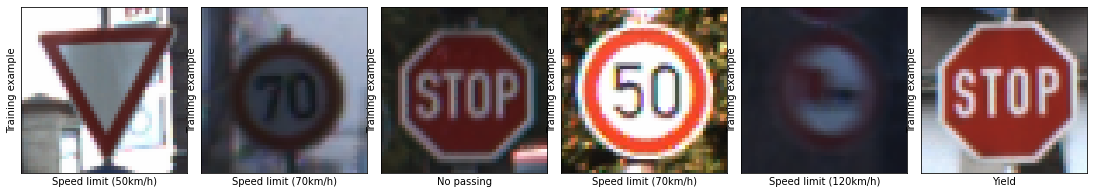

In [164]:
def list_images(dataset, dataset_y, ylabel="", cmap=None):

    plt.figure(figsize=(15, 16))
    for i in range(6):
        plt.subplot(1, 6, i+1)
        indx = random.randint(0, len(dataset))
        #Use gray scale color map if there is only one channel
        cmap = 'gray' if len(dataset[indx].shape) == 2 else cmap
        plt.imshow(dataset[indx], cmap = cmap)
        plt.xlabel(signs[dataset_y[indx]])
        plt.ylabel(ylabel)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()
list_images(X_train, Y_train, "Training example")

In [157]:
def get_model(lx,ly,lz):
    
    model = keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (5, 5), padding='same',  activation='relu', input_shape=(lx,ly,lz)))
    model.add(tf.keras.layers.BatchNormalization(axis=-1))      
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same',  activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(axis=-1))
    model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(axis=-1))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Dense(43, activation='softmax'))
    
    return model

In [158]:
#print(X_train)
(n,lx,ly,lz) = X_train.shape
#n,lx,ly,lz

In [159]:
mymodel=get_model(lx,ly,lz)

In [160]:
mymodel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 32)        2432      
                                                                 
 batch_normalization_4 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 64)        51264     
                                                                 
 batch_normalization_5 (Batc  (None, 24, 24, 64)      

In [161]:
mymodel.compile(optimizer = 'adam',
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])

In [162]:
history = mymodel.fit(  X_train, Y_train,
                      batch_size      = 64,
                      epochs          = 10,
                      verbose         = 1,
                      validation_data = (X_test, Y_test))

Epoch 1/10
349/349 [==============================] - 14s 37ms/step - loss: 3.4686 - accuracy: 0.0799 - val_loss: 4.3932 - val_accuracy: 0.0532
Epoch 2/10
349/349 [==============================] - 6s 18ms/step - loss: 2.8647 - accuracy: 0.0892 - val_loss: 5.2257 - val_accuracy: 0.0641
Epoch 3/10
349/349 [==============================] - 6s 18ms/step - loss: 2.7513 - accuracy: 0.0940 - val_loss: 5.8674 - val_accuracy: 0.0578
Epoch 4/10
349/349 [==============================] - 7s 21ms/step - loss: 2.6920 - accuracy: 0.0914 - val_loss: 5.9113 - val_accuracy: 0.0590
Epoch 5/10
349/349 [==============================] - 7s 19ms/step - loss: 2.6671 - accuracy: 0.0941 - val_loss: 6.3900 - val_accuracy: 0.0665
Epoch 6/10
349/349 [==============================] - 6s 18ms/step - loss: 2.6474 - accuracy: 0.0976 - val_loss: 6.2761 - val_accuracy: 0.0711
Epoch 7/10
349/349 [==============================] - 6s 18ms/step - loss: 2.6439 - accuracy: 0.0969 - val_loss: 6.6312 - val_accuracy: 0.067

In [146]:
max_accuracy = max(history.history["accuracy"])
max_val_accuracy = max(history.history["val_accuracy"])

In [147]:
print("------>Max-Accuracy: ",max_accuracy)
print("------>Max-Val-Accuracy: ",max_val_accuracy)

------>Max-Accuracy:  0.0998118445277214
------>Max-Val-Accuracy:  0.05991026759147644


In [149]:
pred = mymodel.predict(X_test[None,0])
pred = np.argmax(pred, axis=1)
print(pred[0])
print(Y_test[0])
classes[pred[0]]

1/1 [==============================] - 0s 130ms/step
2
16


'Speed limit (50km/h)'

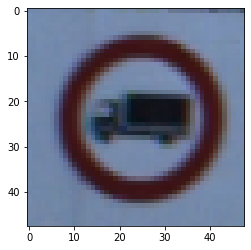

In [58]:
plt.imshow(X_test[0], cmap='gray')